## Install the needed libraries

In [ ]:
# !pip install --upgrade pip
# !pip install --upgrade setuptools
# !apt-get install -y python3-dev
# !pip install scikit-learn
# !pip3 install pyproject.toml-based

In [1]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 55.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=08501693479cbdb6d88c9678ba828a37248ecd3612609a21054a21804ffde28d
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

### Import the needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Function to compute the metrics

In [3]:
def compute_classification_report(true_labels_column, predicted_labels_column):
    report = classification_report(true_labels_column, predicted_labels_column)
    accuracy = accuracy_score(true_labels_column, predicted_labels_column)
    precision = precision_score(true_labels_column, predicted_labels_column, average='macro')
    recall = recall_score(true_labels_column, predicted_labels_column, average='macro')
    f1 = f1_score(true_labels_column, predicted_labels_column, average='macro')

    print("Classification Report:")
    print(report)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return accuracy, precision, recall, f1

# Function to plot the metrics

In [ ]:
def plot_metrics(labels, accuracy_values):

    accuracy_values_scaled = [value * 100 for value in accuracy_values]

    # Create a counter plot
    fig, ax = plt.subplots()
    bar_width = 0.2  # Smaller width
    index = np.arange(len(labels))

    bars = ax.bar(index, accuracy_values_scaled, bar_width)

    # Add values on top of the bars
    for bar, value in zip(bars, accuracy_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f'{value:.2f}%', ha='center', va='bottom')

    ax.set_xlabel('Datasets')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('BERT Accuracy Comparison')
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# BERT for 17 topics

## Read data

In [4]:
df = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/MN-DS-news-classification.csv")
df = df.rename(columns={'category_level_1': 'category_1', 'category_level_2': 'category_2'})

In [5]:
df

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_1,category_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,907640,therussophileorg--2019-12-15--Iran to build ov...,2019-12-15,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"Sun, 15 Dec 2019 10:42:50 +0000",1576424570,1576413702,"conflict, war and peace",post-war reconstruction
10913,892720,therussophileorg--2019-10-12--Ukraine has no m...,2019-10-12,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"Sat, 12 Oct 2019 20:56:01 +0000",1570928161,1570922006,"conflict, war and peace",post-war reconstruction
10914,870499,therussophileorg--2019-07-06--Irans contributi...,2019-07-06,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,2019-07-06 17:51:38+00:00,1562449898,1567536625,"conflict, war and peace",post-war reconstruction
10915,887334,therussophileorg--2019-09-25--Iraqi president ...,2019-09-25,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,2019-09-25 16:58:01+00:00,1569445081,1570222223,"conflict, war and peace",post-war reconstruction


In [6]:
df["category_1"].value_counts()

society                                      1100
sport                                         907
politics                                      900
conflict, war and peace                       800
religion and belief                           800
science and technology                        800
labour                                        703
health                                        700
education                                     607
environment                                   600
human interest                                600
crime, law and justice                        500
disaster, accident and emergency incident     500
weather                                       400
economy, business and finance                 400
arts, culture, entertainment and media        300
lifestyle and leisure                         300
Name: category_1, dtype: int64

In [7]:
X = df.content
Y = df.category_1

## split the data

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.5, random_state = 12342 , stratify=Y)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.5, random_state = 12342 , stratify=y_temp)


In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(5458,)
(5458,)
(2729,)
(2729,)
(2730,)
(2730,)


In [10]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

## Text preprocessing

In [11]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen=512,
                                                                                          max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


## Download the model

In [12]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner_1 = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=6)
learner_2 = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=6)


Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


## Using the cyclical learning rate policy

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/4
910/910 [==============================] - 193s 187ms/step - loss: 2.7805 - accuracy: 0.1420
Epoch 2/4
910/910 [==============================] - 170s 187ms/step - loss: 1.8559 - accuracy: 0.4502
Epoch 3/4
910/910 [==============================] - 143s 158ms/step - loss: 9.1827 - accuracy: 0.0684


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 3.42E-06
	Min numerical gradient (purple): 8.55E-06
	Min loss divided by 10 (omitted from plot): 1.18E-05


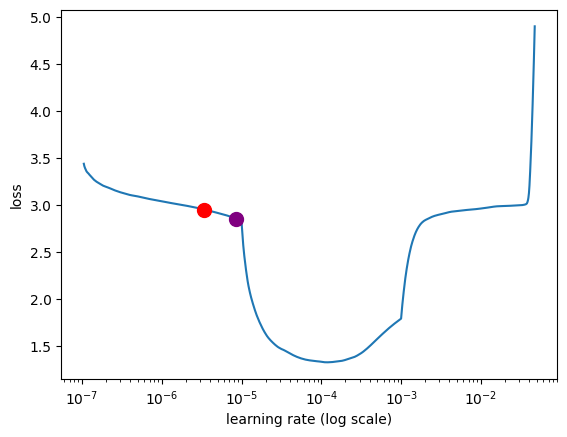

In [13]:
learner_1.lr_find(show_plot=True, max_epochs=4, suggest= True)

In [14]:
# For using the cyclical learning
learner_1.fit_onecycle(8.55E-06, 4)



begin training using onecycle policy with max lr of 8.55e-06...
Epoch 1/4
910/910 [==============================] - 221s 222ms/step - loss: 2.4008 - accuracy: 0.2765 - val_loss: 1.5354 - val_accuracy: 0.5988
Epoch 2/4
910/910 [==============================] - 198s 218ms/step - loss: 1.1713 - accuracy: 0.6724 - val_loss: 0.9665 - val_accuracy: 0.7171
Epoch 3/4
910/910 [==============================] - 198s 218ms/step - loss: 0.7546 - accuracy: 0.7818 - val_loss: 0.8333 - val_accuracy: 0.7457
Epoch 4/4
910/910 [==============================] - 198s 218ms/step - loss: 0.5112 - accuracy: 0.8591 - val_loss: 0.8158 - val_accuracy: 0.7585


In [15]:
learner_1.validate(val_data=(x_val_bert, y_val_bert), class_names=["society", "sport", "politics" , "conflict, war and peace" , "religion and belief" , "science and technology" , "labour" ,
                                                                                                        "health", "education", "environment", "human interest" , "crime, law and justice" , "disaster, accident and emergency incident" ,
                                                                                                        "weather" , "economy, business and finance" , "arts, culture, entertainment and media" , "lifestyle and leisure"])

86/86 [==============================] - 28s 280ms/step
                                           precision    recall  f1-score   support

                                  society       0.64      0.55      0.59        75
                                    sport       0.78      0.82      0.80       200
                                 politics       0.77      0.74      0.76       125
                  conflict, war and peace       0.67      0.62      0.64       125
                      religion and belief       0.78      0.69      0.73       100
                   science and technology       0.79      0.76      0.78       151
                                   labour       0.84      0.79      0.82       150
                                   health       0.71      0.84      0.77       175
                                education       0.66      0.71      0.68       150
                              environment       0.84      0.85      0.84       176
                           hum

array([[ 41,   0,   2,   0,   2,   1,   1,   0,   7,   0,   0,   2,   4,
          2,   8,   5,   0],
       [  4, 165,   2,   3,   4,   1,   0,   0,   0,   1,   0,   8,   9,
          0,   2,   0,   1],
       [  0,   3,  93,   3,   2,   0,   0,   4,   0,   2,   0,  10,   6,
          0,   2,   0,   0],
       [  1,   4,   2,  77,   2,   1,   3,   2,   4,   1,   0,   6,   1,
          0,   4,   0,  17],
       [  0,   3,   1,   0,  69,   0,   2,   0,   0,   7,   0,  12,   1,
          2,   3,   0,   0],
       [  1,   0,   1,   5,   0, 115,   0,   1,   2,   4,   0,   4,   8,
          4,   5,   1,   0],
       [  0,   0,   0,   6,   1,   1, 119,   0,   8,   0,   0,   2,   1,
          9,   0,   1,   2],
       [  0,   0,   2,   2,   0,   1,   0, 147,   5,   1,   0,   3,   2,
          4,   5,   3,   0],
       [  2,   1,   0,   1,   0,   3,   2,   2, 107,   0,   2,   5,   1,
          7,  10,   7,   0],
       [  2,   0,   2,   1,   0,   2,   0,   5,   0, 149,   1,   4,   0,
         

## Using the triangular learning rate policy

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/4
910/910 [==============================] - 170s 187ms/step - loss: 2.7171 - accuracy: 0.1653
Epoch 2/4
910/910 [==============================] - 170s 187ms/step - loss: 1.8140 - accuracy: 0.4745
Epoch 3/4
910/910 [==============================] - 142s 156ms/step - loss: 8.6795 - accuracy: 0.0785


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 4.04E-06
	Min numerical gradient (purple): 8.55E-06
	Min loss divided by 10 (omitted from plot): 9.36E-06


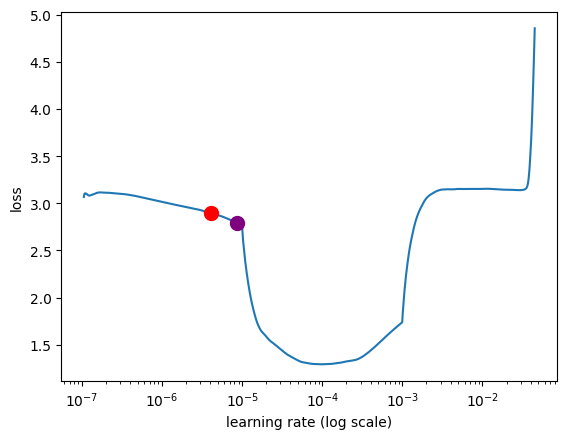

In [16]:
learner_2.lr_find(show_plot=True, max_epochs=4, suggest= True)

In [17]:
# For using the triangular learning
learner_2.autofit(8.55E-06)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 8.55e-06...
Epoch 1/1024
910/910 [==============================] - 214s 223ms/step - loss: 1.8571 - accuracy: 0.4474 - val_loss: 1.1039 - val_accuracy: 0.6761
Epoch 2/1024
910/910 [==============================] - 198s 218ms/step - loss: 0.9379 - accuracy: 0.7268 - val_loss: 0.9170 - val_accuracy: 0.7237
Epoch 3/1024
910/910 [==============================] - 198s 218ms/step - loss: 0.7008 - accuracy: 0.7952 - val_loss: 0.8378 - val_accuracy: 0.7475
Epoch 4/1024
910/910 [==============================] - 198s 218ms/step - loss: 0.5260 - accuracy: 0.8514 - val_loss: 0.8206 - val_accuracy: 0.7523
Epoch 5/1024
910/910 [==============================] - 198s 218ms/step - loss: 0.4016 - accuracy: 0.8848 - val_loss: 0.8253 - val_accuracy: 0.7615
Epoch 6/1024
910/910 [==============================] - ETA: 0s - loss: 0

In [18]:
learner_2.validate(val_data=(x_val_bert, y_val_bert), class_names=["society", "sport", "politics" , "conflict, war and peace" , "religion and belief" , "science and technology" , "labour" ,
                                                                                                        "health", "education", "environment", "human interest" , "crime, law and justice" , "disaster, accident and emergency incident" ,
                                                                                                        "weather" , "economy, business and finance" , "arts, culture, entertainment and media" , "lifestyle and leisure"])

86/86 [==============================] - 28s 280ms/step
                                           precision    recall  f1-score   support

                                  society       0.69      0.51      0.58        75
                                    sport       0.76      0.88      0.81       200
                                 politics       0.77      0.74      0.76       125
                  conflict, war and peace       0.69      0.61      0.65       125
                      religion and belief       0.79      0.72      0.75       100
                   science and technology       0.78      0.76      0.77       151
                                   labour       0.84      0.77      0.80       150
                                   health       0.72      0.83      0.77       175
                                education       0.65      0.59      0.62       150
                              environment       0.84      0.83      0.84       176
                           hum

array([[ 38,   0,   1,   0,   1,   1,   0,   0,   3,   0,   0,   5,   5,
          3,  13,   5,   0],
       [  1, 176,   2,   2,   4,   0,   0,   0,   0,   1,   0,   8,   4,
          0,   2,   0,   0],
       [  0,   5,  93,   1,   2,   1,   0,   2,   0,   2,   1,  12,   5,
          0,   1,   0,   0],
       [  1,   4,   2,  76,   1,   1,   4,   2,   3,   1,   0,   5,   1,
          1,   5,   0,  18],
       [  0,   3,   0,   1,  72,   0,   2,   0,   0,   5,   0,   8,   1,
          3,   5,   0,   0],
       [  1,   1,   1,   4,   0, 115,   0,   1,   2,   5,   0,   4,   7,
          4,   5,   1,   0],
       [  0,   0,   0,   7,   2,   1, 115,   0,  10,   1,   0,   1,   0,
         10,   0,   1,   2],
       [  0,   0,   2,   1,   0,   2,   0, 145,   5,   1,   0,   4,   2,
          3,   9,   1,   0],
       [  2,   5,   0,   1,   1,   4,   3,   3,  89,   0,   2,   4,   1,
          6,  21,   7,   1],
       [  2,   0,   3,   0,   2,   2,   0,   2,   0, 146,   0,   4,   1,
         

In [19]:
# getting predictor variable
predictor_1 = ktrain.get_predictor(learner_1.model, preproc)
predictor_2 = ktrain.get_predictor(learner_2.model, preproc)


In [20]:
y_pred_1 = predictor_1.predict(x_test.tolist())
y_pred_2 = predictor_2.predict(x_test.tolist())

## Compute the metrics for testing set

In [21]:
accuracy_17_1, precision_17_1, recall_17_1, f1_17_1 = compute_classification_report(y_test , y_pred_1)

Classification Report:
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.54      0.52      0.53        75
                  conflict, war and peace       0.73      0.81      0.76       200
                   crime, law and justice       0.85      0.74      0.79       125
disaster, accident and emergency incident       0.77      0.69      0.73       125
            economy, business and finance       0.79      0.67      0.72       100
                                education       0.80      0.72      0.76       152
                              environment       0.81      0.84      0.83       150
                                   health       0.74      0.85      0.79       175
                           human interest       0.68      0.69      0.68       150
                                   labour       0.82      0.88      0.85       176
                    lifestyle and leisure       0.82      0.73 

In [22]:
accuracy_17_2, precision_17_2, recall_17_2, f1_17_2 = compute_classification_report(y_test , y_pred_2)

Classification Report:
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.60      0.52      0.56        75
                  conflict, war and peace       0.71      0.85      0.77       200
                   crime, law and justice       0.83      0.76      0.79       125
disaster, accident and emergency incident       0.82      0.68      0.74       125
            economy, business and finance       0.80      0.65      0.72       100
                                education       0.76      0.73      0.74       152
                              environment       0.81      0.84      0.83       150
                                   health       0.76      0.83      0.79       175
                           human interest       0.71      0.59      0.64       150
                                   labour       0.82      0.86      0.84       176
                    lifestyle and leisure       0.83      0.77 

## Save the models

In [24]:
predictor_1.save('/content/drive/MyDrive/Topics/BERT/bert_17_topics_1_75.67')
predictor_2.save('/content/drive/MyDrive/Topics/BERT/bert_17_topics_2_74.82')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
